# DS110 / ML PROJECT / HEART DISEASE PREDICTION 

**ABDUL RAFAY / MINSEO KIM**

**Template #2:**

Decide on two approaches that you could take to predict some variable with machine learning. Identify the columns you will use for prediction & plan to vary some parameter in each approach.

**Objective:**

Predict whether someone has heart disease based on their attributes; age, gender, …

For the final project, we have selected the **“Heart Disease UCI”** dataset from the University of California Irvine’s Machine Learning Repository. 

The link for the dataset can be found in : https://archive.ics.uci.edu/ml/datasets/Heart+Disease, which comprises of multiple datasets from different medical centers, with patient’s attributes such as: age, sex, cp (chest pain type), blood pressure, thalach (maximum heart rate), cholesterol levels, and presence of heart disease.

Same dataset in .csv format can be found in : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

**The data was collected from the following locations by:** 

     1. Cleveland Clinic Foundation (cleveland.data) by Robert Detrano, M.D., Ph.D.
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data) by Andras Janosi, M.D.
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data) by Robert Detrano, M.D., Ph.D.
     4. University Hospital, Zurich, Switzerland (switzerland.data) by William Steinbrunn, M.D.
     5. University Hospital, Basel, Switzerland (switzerland.data) by Matthias Pfisterer, M.D.

**Description about datasets from UCI ML Repository is as follows:**

“The database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the **Cleveland database** is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).”
  
The dataset includes information on **303 patients**, but for the purpose of predicting heart disease, only 14 out of 76 available features were considered relevant in published studies. Therefore, we will be using the dataset that contains data for 303 patients with these **14 relevant features**. From which we will be using our own selection of features to accurately predict the presence of heart disease in patients.

**ML Methods :** 

**Decision Tree Classifier**
We will be accessing it from scikit-learn library’s DecisionTreeClassifier class; 
Also we will be varying the maximum depth of the tree to achieve the best possible performance outcome.

**Support Vector Machine Classifier** 
We will be again using scikit-learn library but this time, accessing an SVC class; 
This time we will vary the regularization parameter and kernel function to achieve best possible performance.

**Columns:** 

**id** (Unique id for each patient); 
**age** (Age of the patient in years); 
**dataset** (place of study);
**sex** (Male/Female);
**cp** chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic]);
**trestbps** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital));
**chol** (serum cholesterol in mg/dl);
**fbs** (if fasting blood sugar > 120 mg/dl);
**restecg** (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy];
**thalach**: maximum heart rate achieved;
**exang**: exercise-induced angina (True/ False);
**oldpeak**: ST depression induced by exercise relative to rest;
**slope**: the slope of the peak exercise ST segment;
**ca**: number of major vessels (0-3) colored by fluoroscopy;
**thal**: [normal; fixed defect; reversible defect];
**num**: the predicted attribute;

For both classifier approaches we will be using attributes of patients : **age, sex, cp, trestpbs, chol, thalach, ** to predict the presence of heart disease for a given patient. Presence of heart disease is denoted in **'num'**.




------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
# CODES:
## Import Modules

In [58]:
# IMPORT ALL THE MODULES AS NEEDED.
# All imports in this cell for organization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve
from sklearn.decomposition import PCA

## Load Dataset

In [20]:
# Load the dataset as dataframe.
df = pd.read_csv('/Users/rafayabdul/Downloads/heart_disease_uci.csv')

# Dataframe heading to view the format.
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Preprocessing

<AxesSubplot:>

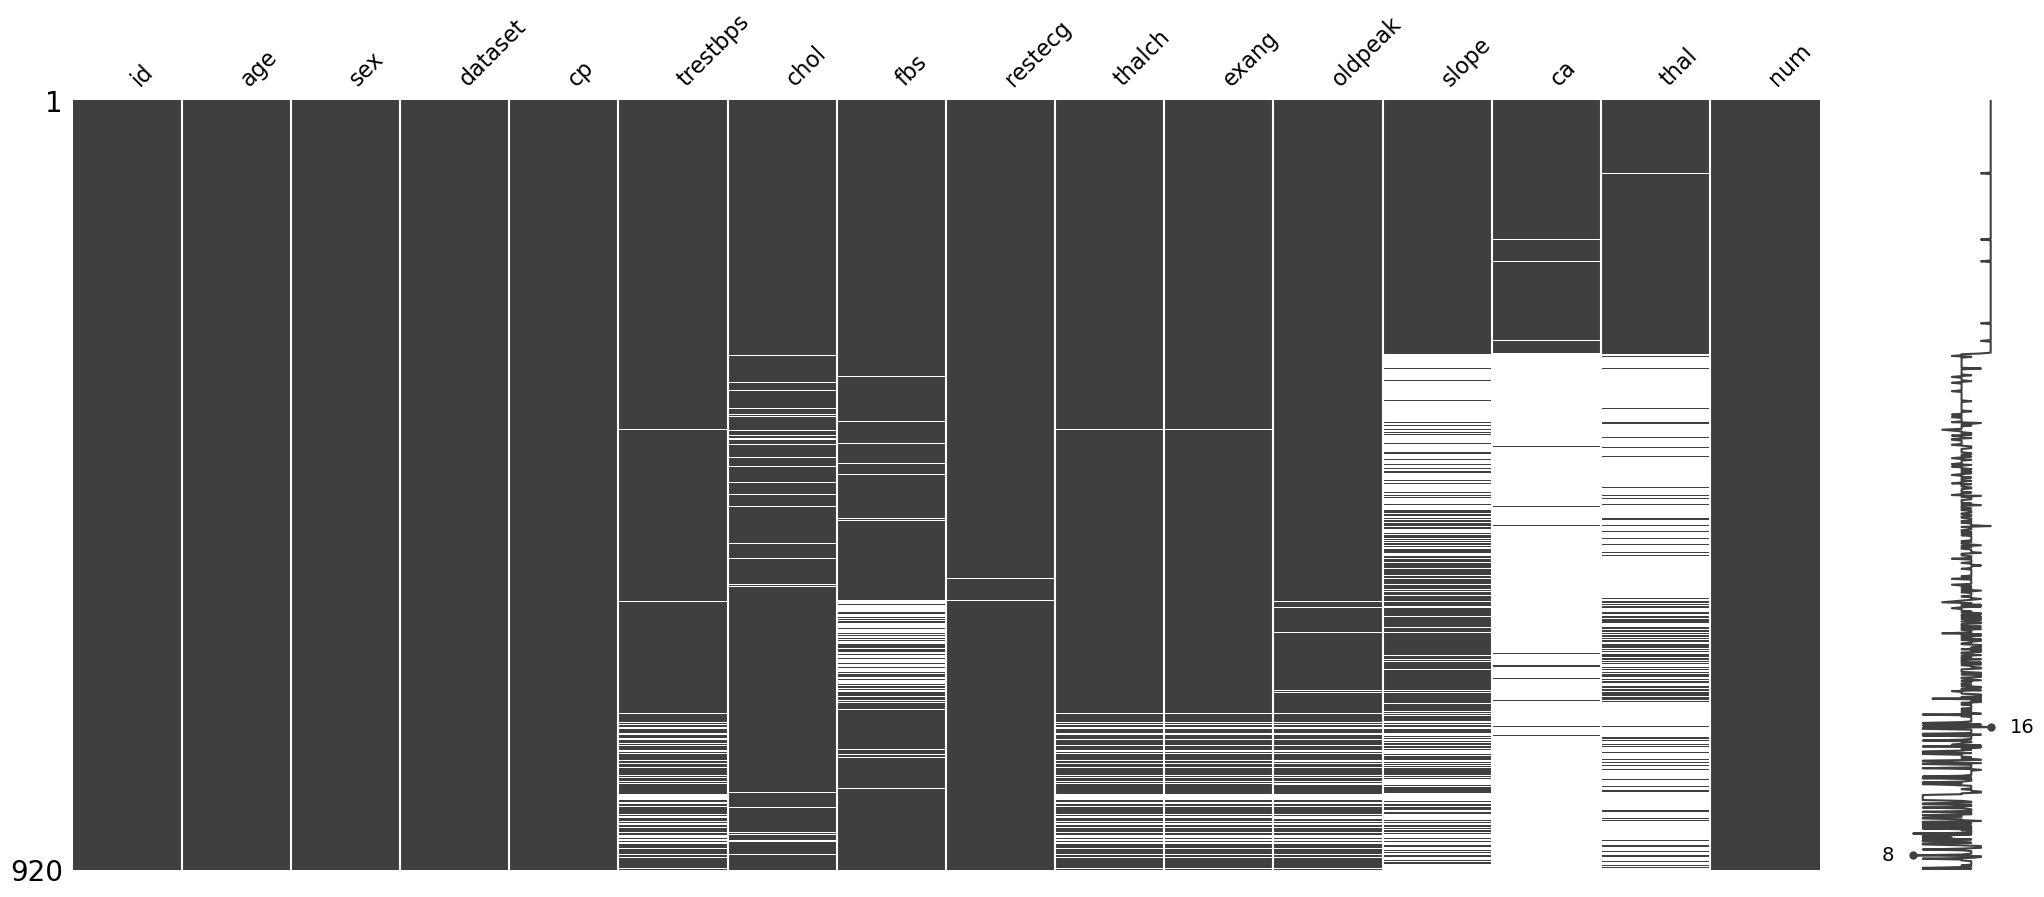

In [21]:
# Using MSNO module - missing values represented as horizontal lines.
msno.matrix(df)

In [22]:
df.trestbps=df.trestbps.fillna(df['trestbps'].median())

df.chol=df.chol.fillna(df['chol'].median())

df.fbs=df.fbs.fillna(False)

df.restecg=df.restecg.fillna('normal')

df.thalch=df.thalch.fillna(df['thalch'].mean())

df.exang=df.exang.fillna(False)

df.oldpeak=df.oldpeak.fillna(df['oldpeak'].mean())

df.slope=df.slope.fillna('flat')

df.thal=df.thal.fillna('normal')

<AxesSubplot:>

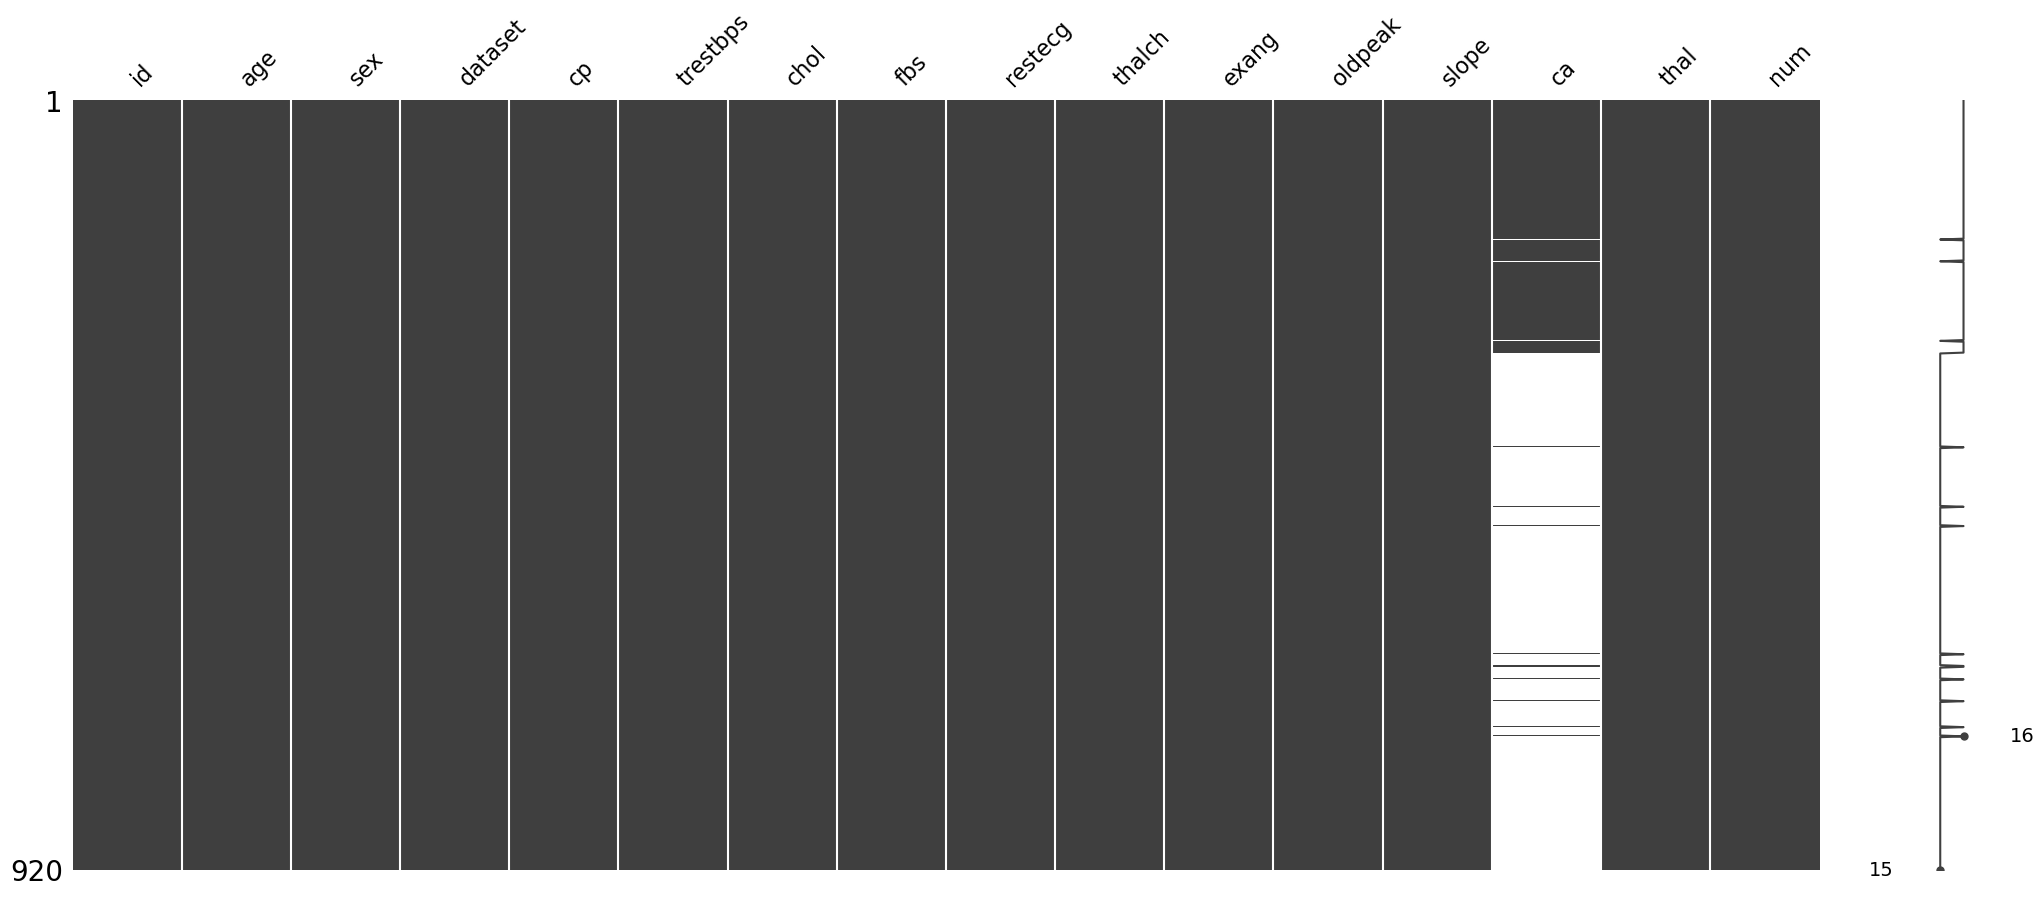

In [23]:
msno.matrix(df)

<AxesSubplot:>

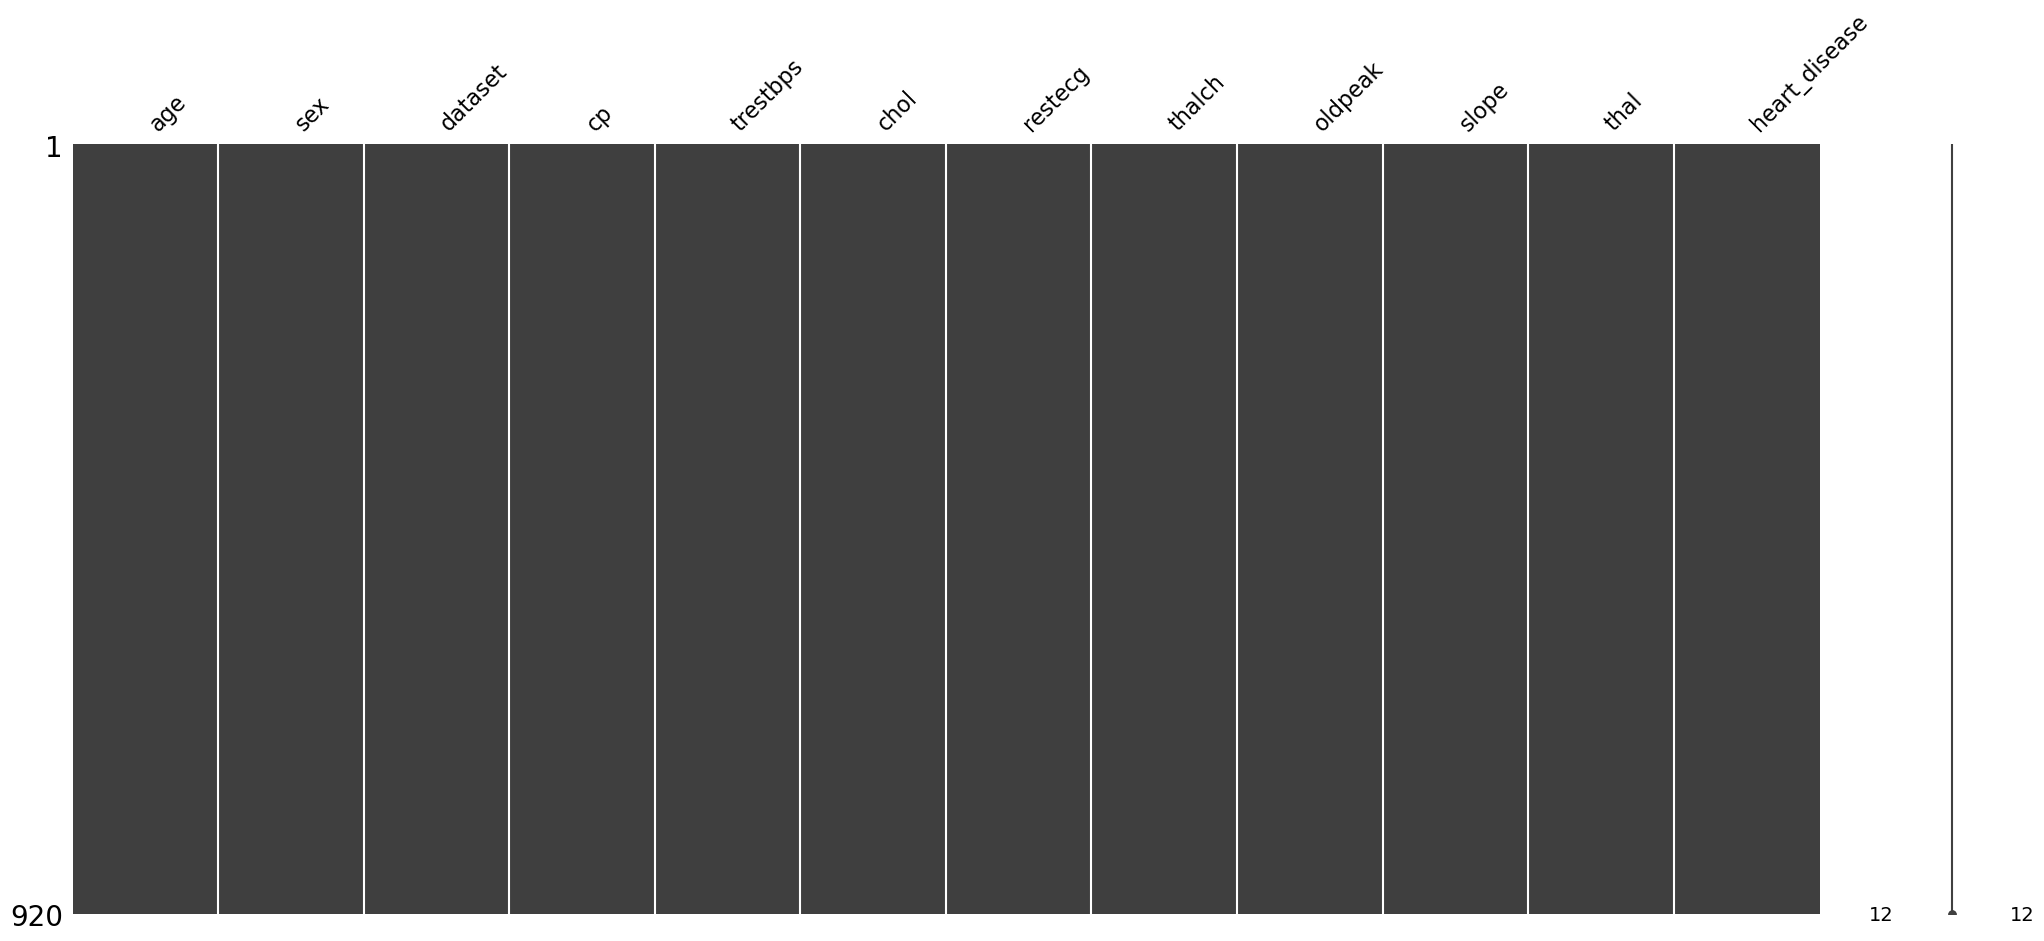

In [24]:
# Rename columns as needed.
df['heart_disease'] = df['num']

# Drop columns as needed. 
df = df.drop(columns=['id', 'fbs', 'exang', 'ca', 'num'])

# Check missing portion once again.
msno.matrix(df)

**No missing portion in the data. (304:10 = rows:columns)**

## Label Encoder

In [25]:
df.head()

,age,sex,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,heart_disease
0,63,Male,Cleveland,typical angina,145.0,233.0,lv hypertrophy,150.0,2.3,downsloping,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,lv hypertrophy,108.0,1.5,flat,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,lv hypertrophy,129.0,2.6,flat,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,normal,187.0,3.5,downsloping,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,lv hypertrophy,172.0,1.4,upsloping,normal,0


**Our data set's categorical data needs to be encoded, to be processed for ML.**

In [26]:
# Use LabelEncoder to convert categorical data.

l_sex=LabelEncoder()
l_cp=LabelEncoder()
l_restecg=LabelEncoder()
l_slope=LabelEncoder()
l_heart_disease=LabelEncoder()
l_dataset=LabelEncoder()
l_thal=LabelEncoder()

df['sex'] = l_sex.fit_transform(df['sex'])
df['cp'] = l_cp.fit_transform(df['cp'])
df['restecg'] = l_restecg.fit_transform(df['restecg'])
df['slope'] = l_slope.fit_transform(df['slope'])
df['heart_disease'] = l_heart_disease.fit_transform(df['heart_disease'])
df['dataset'] = l_dataset.fit_transform(df['dataset'])
df['thal'] = l_thal.fit_transform(df['thal'])

# Verify if dataset is encoded.
df.head()

,age,sex,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,heart_disease
0,63,1,0,3,145.0,233.0,0,150.0,2.3,0,0,0
1,67,1,0,0,160.0,286.0,0,108.0,1.5,1,1,2
2,67,1,0,0,120.0,229.0,0,129.0,2.6,1,2,1
3,37,1,0,2,130.0,250.0,1,187.0,3.5,0,1,0
4,41,0,0,1,130.0,204.0,0,172.0,1.4,2,1,0


In [27]:
df['heart_disease']=np.where(df['heart_disease']>0, 1, 0)

In [28]:
df.head()

,age,sex,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,heart_disease
0,63,1,0,3,145.0,233.0,0,150.0,2.3,0,0,0
1,67,1,0,0,160.0,286.0,0,108.0,1.5,1,1,1
2,67,1,0,0,120.0,229.0,0,129.0,2.6,1,2,1
3,37,1,0,2,130.0,250.0,1,187.0,3.5,0,1,0
4,41,0,0,1,130.0,204.0,0,172.0,1.4,2,1,0


**Define the target (predicting outcome) column and it drop from dataset**

In [29]:
# Define it as traget for later reference.
target = df['heart_disease']

# Remove column that we will try to predict.
del df['heart_disease']

# Verify column dropped.
df.shape

(920, 11)

# Train Set & Test Set

In [30]:
# X : Features, y : target outcome
X = df.iloc[:,:]
y = target.iloc[:,]

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Normalization (SVC)

In [31]:
#Normalize Data

#Initialize
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
# Decision Tree Classifier

In [32]:
#DECISION TREE CLASSIFER

# Initialize classifier
clf = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=4)


# Train classifier
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8369565217391305

In [33]:
# Make predictions on test set
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1])

In [34]:
# Evaluate Performace
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print('Accurcy:', accuracy, '\n\nClassification Report:\n\n', clf_report)

Accurcy: 0.8369565217391305 

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.76      0.79        75
           1       0.84      0.89      0.87       109

    accuracy                           0.84       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.84      0.84      0.84       184



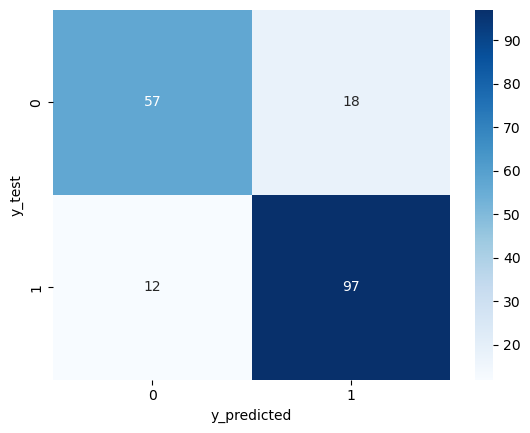

In [35]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('y_predicted')
plt.ylabel('y_test')
plt.show()

In [36]:
#plot_learning_curve(d_tree_CV, 'Decision Tree', X_train, y_train)

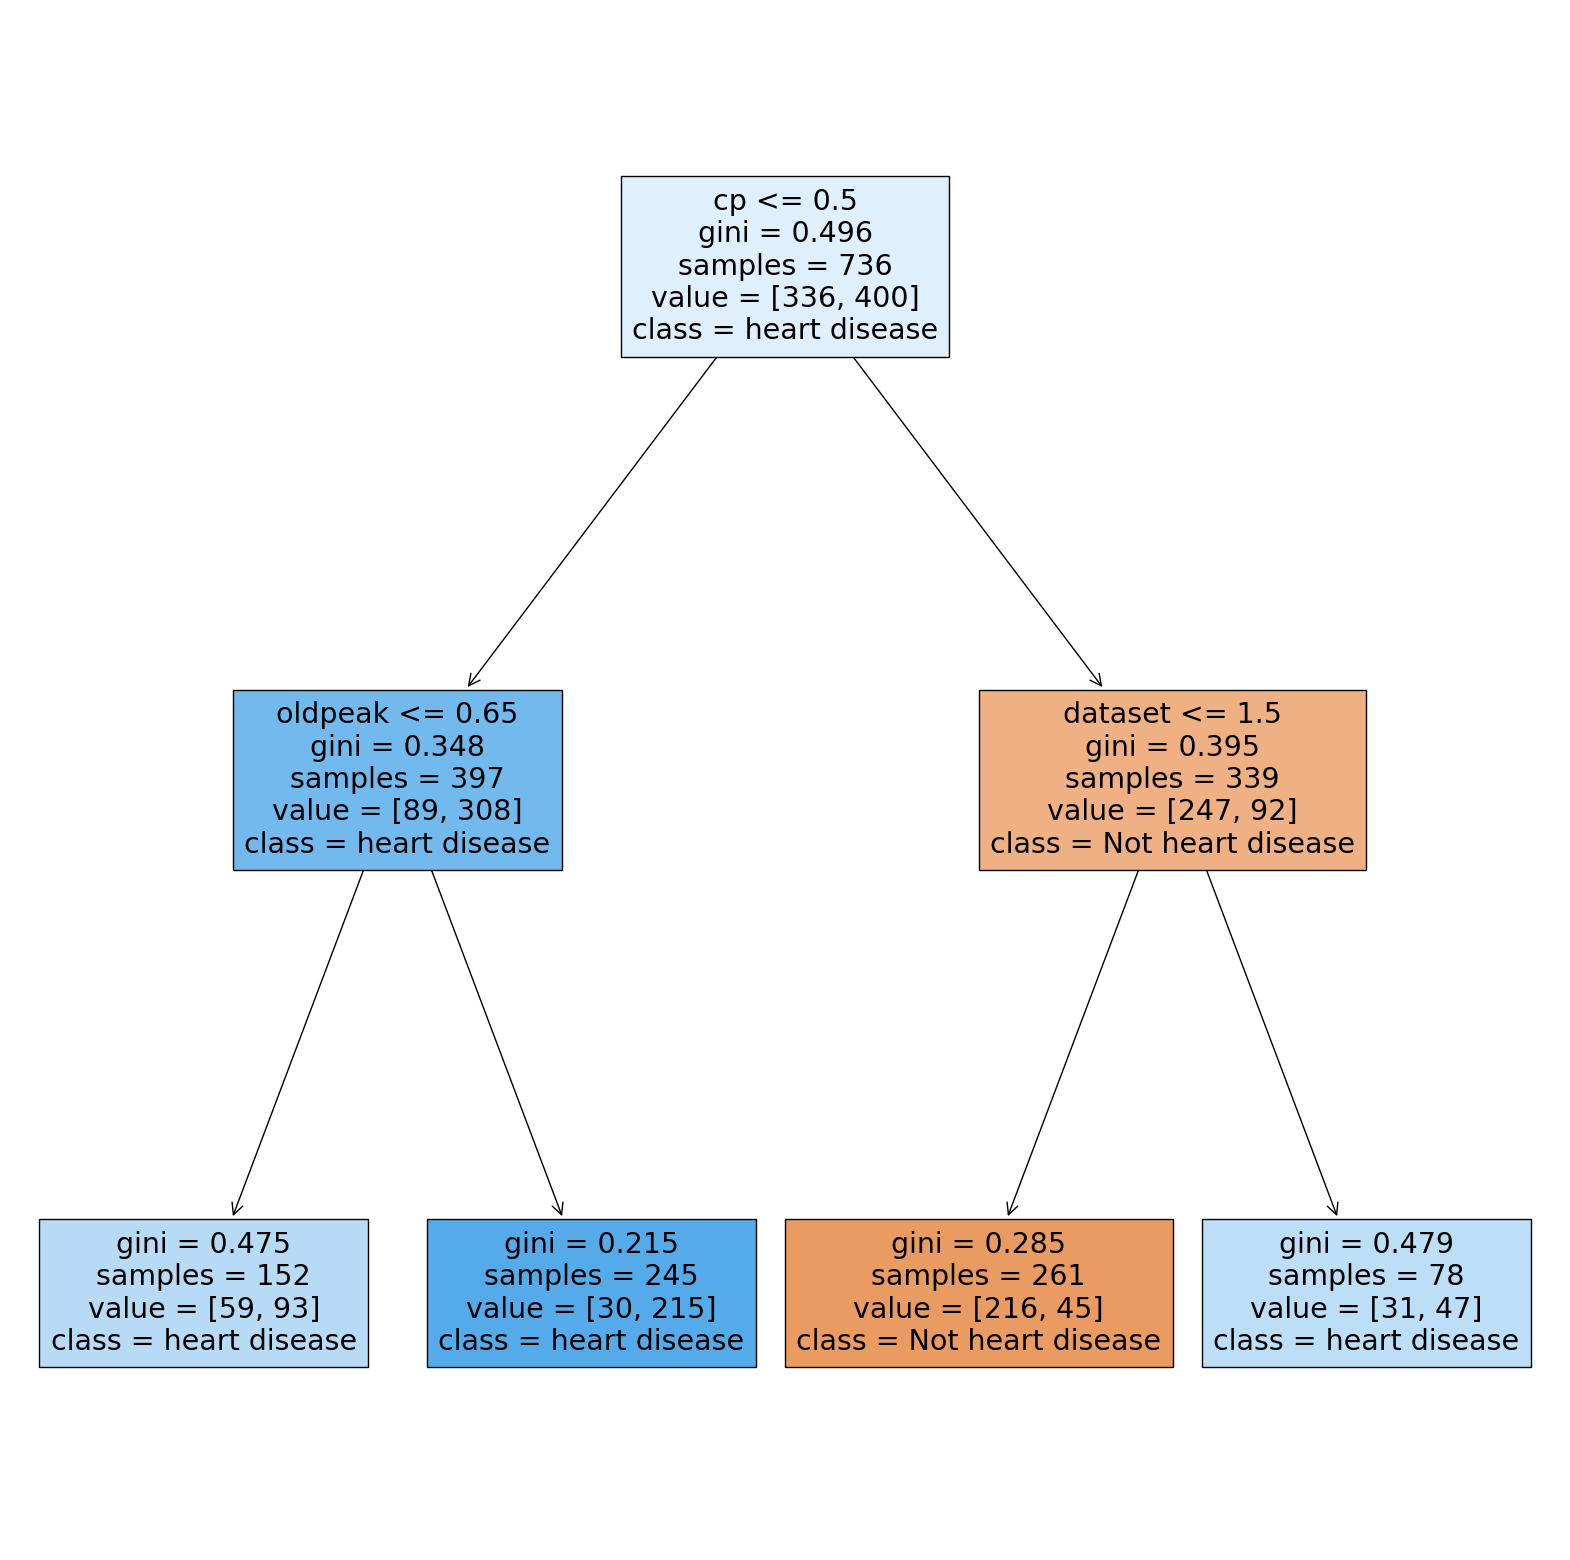

In [37]:
# Plotting the tree
plt.figure(figsize=(20, 20))
features = X.columns
classes = ['Not heart disease', 'heart disease']
tree.plot_tree(clf, feature_names=features, class_names=classes, filled=True)
plt.show()

/Users/rafayabdul/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


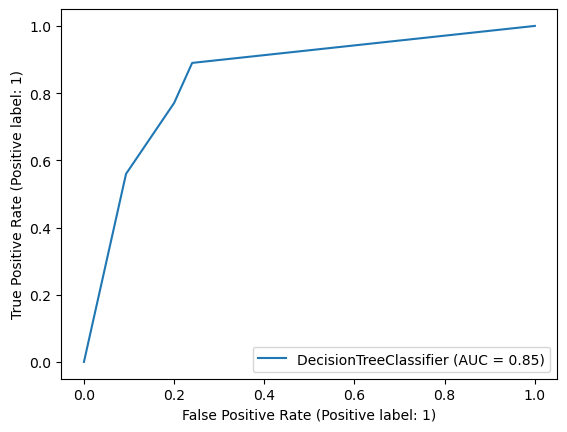

In [38]:
# Binary Classification Performance
plot_roc_curve(clf, X_test, y_test)
plt.show()

               age       sex   dataset        cp  trestbps      chol  \
age       1.000000  0.056889  0.235076 -0.076519  0.230784 -0.086010   
sex       0.056889  1.000000  0.285734 -0.125933 -0.002145 -0.194029   
dataset   0.235076  0.285734  1.000000 -0.150334  0.008343 -0.410777   
cp       -0.076519 -0.125933 -0.150334  1.000000 -0.023980  0.065089   
trestbps  0.230784 -0.002145  0.008343 -0.023980  1.000000  0.089484   
chol     -0.086010 -0.194029 -0.410777  0.065089  0.089484  1.000000   
restecg  -0.006652  0.072160  0.460189 -0.070150  0.010263 -0.199594   
thalch   -0.353471 -0.177135 -0.382415  0.289362 -0.104143  0.226203   
oldpeak   0.248082  0.102733  0.048533 -0.173515  0.159609  0.043491   
slope    -0.077087 -0.105805 -0.297152  0.113415 -0.050446  0.033221   
thal      0.101109  0.076023 -0.146806 -0.097099  0.066675 -0.052708   

           restecg    thalch   oldpeak     slope      thal  
age      -0.006652 -0.353471  0.248082 -0.077087  0.101109  
sex       0.0

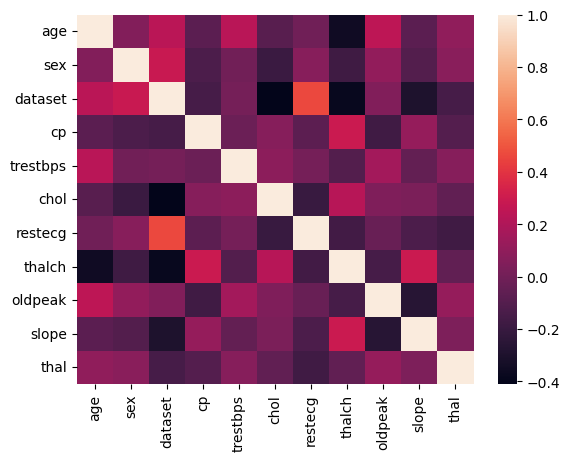

In [39]:
# Correlation of Data
corr = df.corr()
print(corr)

sns.heatmap(corr)
plt.show()

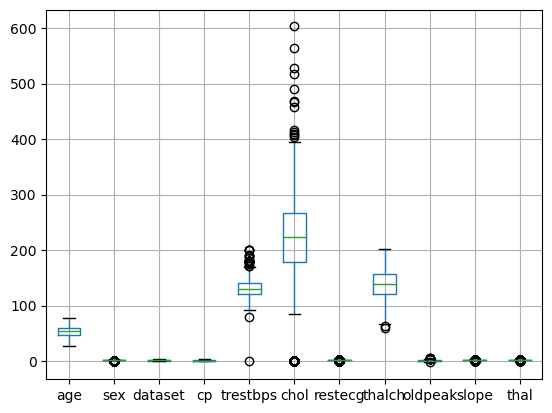

In [40]:
# Outliers of Data
df.boxplot()
plt.show()

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
# SVC

In [55]:
#SVC
clf2 = SVC(kernel='linear', C=1, gamma='auto')
clf2.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Evaluate Performace
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print("Predicted:", y_pred)
print('\nAccurcy:', accuracy, '\n\nClassification Report:\n\n', clf_report)

Predicted: [1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]

Accurcy: 0.6793478260869565 

Classification Report:

               precision    recall  f1-score   support

           0       0.70      0.37      0.49        75
           1       0.67      0.89      0.77       109

    accuracy                           0.68       184
   macro avg       0.69      0.63      0.63       184
weighted avg       0.68      0.68      0.65       184



/Users/rafayabdul/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


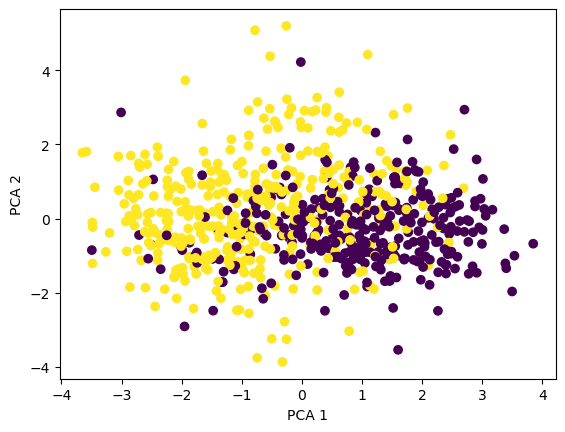

In [64]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

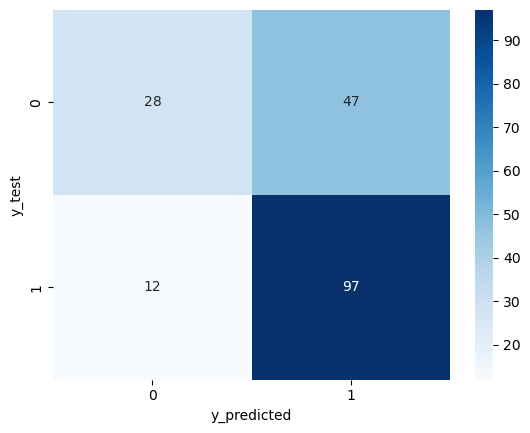

In [42]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('y_predicted')
plt.ylabel('y_test')
plt.show()